In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\TECHNOSELLERS\Desktop\Project's_for_Portfolio\Data Anaysis project\EDA_Cricket_WorldCup\world_cup_2019.csv")
df.head()

,Id,Date,Match,Ground / Location,Result
0,1,30/05/2019,1st Match: England v South Africa,"Kennington Oval, London",England won by 104 runs
1,2,31/05/2019,2nd Match: Pakistan v West Indies,"Trent Bridge, Nottingham",West Indies won by 7 wickets
2,3,01/06/2019,3rd Match: New Zealand v Sri Lanka,"Sophia Gardens, Cardiff",New Zealand won by 10 wickets
3,4,01/06/2019,4th Match: Afghanistan v Australia,"County Ground, Bristol",Australia won by 7 wickets
4,5,02/06/2019,5th Match: Bangladesh v South Africa,"Kennington Oval, London",Bangladesh won by 21 runs


In [2]:
print(f"Data set contain {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()
df.describe()

Data set contain 48 rows and 5 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 48 non-null     int64 
 1   Date               48 non-null     object
 2   Match              48 non-null     object
 3   Ground / Location  48 non-null     object
 4   Result             48 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


,Id
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


In [18]:
# Q1. Total number of matches played in the dataset.

print(f"Total number of matches played: {df.shape[0]}")

Total number of matches played: 48


In [3]:
# Q2. Which team has the highest win percentage?
# win percentage = (wins / matches_played) * 100

df['Winner'] = df['Result'].apply(lambda x: x.split(' won')[0] if 'won' in x else None)
df.head()

,Id,Date,Match,Ground / Location,Result,Winner
0,1,30/05/2019,1st Match: England v South Africa,"Kennington Oval, London",England won by 104 runs,England
1,2,31/05/2019,2nd Match: Pakistan v West Indies,"Trent Bridge, Nottingham",West Indies won by 7 wickets,West Indies
2,3,01/06/2019,3rd Match: New Zealand v Sri Lanka,"Sophia Gardens, Cardiff",New Zealand won by 10 wickets,New Zealand
3,4,01/06/2019,4th Match: Afghanistan v Australia,"County Ground, Bristol",Australia won by 7 wickets,Australia
4,5,02/06/2019,5th Match: Bangladesh v South Africa,"Kennington Oval, London",Bangladesh won by 21 runs,Bangladesh


In [4]:
wins = df['Winner'].value_counts()
df.head()

,Id,Date,Match,Ground / Location,Result,Winner
0,1,30/05/2019,1st Match: England v South Africa,"Kennington Oval, London",England won by 104 runs,England
1,2,31/05/2019,2nd Match: Pakistan v West Indies,"Trent Bridge, Nottingham",West Indies won by 7 wickets,West Indies
2,3,01/06/2019,3rd Match: New Zealand v Sri Lanka,"Sophia Gardens, Cardiff",New Zealand won by 10 wickets,New Zealand
3,4,01/06/2019,4th Match: Afghanistan v Australia,"County Ground, Bristol",Australia won by 7 wickets,Australia
4,5,02/06/2019,5th Match: Bangladesh v South Africa,"Kennington Oval, London",Bangladesh won by 21 runs,Bangladesh


In [5]:
df['Match Clean'] = df['Match'].apply(lambda x : x.split(':')[-1])
df.head()

,Id,Date,Match,Ground / Location,Result,Winner,Match Clean
0,1,30/05/2019,1st Match: England v South Africa,"Kennington Oval, London",England won by 104 runs,England,England v South Africa
1,2,31/05/2019,2nd Match: Pakistan v West Indies,"Trent Bridge, Nottingham",West Indies won by 7 wickets,West Indies,Pakistan v West Indies
2,3,01/06/2019,3rd Match: New Zealand v Sri Lanka,"Sophia Gardens, Cardiff",New Zealand won by 10 wickets,New Zealand,New Zealand v Sri Lanka
3,4,01/06/2019,4th Match: Afghanistan v Australia,"County Ground, Bristol",Australia won by 7 wickets,Australia,Afghanistan v Australia
4,5,02/06/2019,5th Match: Bangladesh v South Africa,"Kennington Oval, London",Bangladesh won by 21 runs,Bangladesh,Bangladesh v South Africa


In [6]:
team_played = pd.Series(df['Match Clean'].str.split(' v ').sum()).str.strip().value_counts()
team_played

England         11
New Zealand     11
Australia       10
India           10
South Africa     9
Pakistan         9
West Indies      9
Sri Lanka        9
Afghanistan      9
Bangladesh       9
Name: count, dtype: int64

In [7]:
win_percentage = ((wins/team_played)*100).round(2)
win_percentage

Afghanistan       NaN
Australia       70.00
Bangladesh      33.33
England         72.73
India           70.00
New Zealand     54.55
Pakistan        55.56
South Africa    33.33
Sri Lanka       33.33
West Indies     22.22
Name: count, dtype: float64

In [10]:
top_team = win_percentage.idxmax()
top_team_percentage = win_percentage.max()
print(f"Top performed team in WC19 is {top_team} and its peformance in percentage is {top_team_percentage}.")

Top performed team in WC19 is England and its peformance in percentage is 72.73.


In [13]:
# Q3. Which stadium hosted the most matches?
most_matches = df['Ground / Location'].value_counts().head()
most_matches

Ground / Location
Old Trafford, Manchester      6
Kennington Oval, London       5
Trent Bridge, Nottingham      5
The Rose Bowl, Southampton    5
Edgbaston, Birmingham         5
Name: count, dtype: int64

In [18]:
top_stadium = most_matches.idxmax()
no_of_matches = most_matches.max()

print(f"{top_stadium} hosted {no_of_matches} matches.")

Old Trafford, Manchester hosted 6 matches.


In [23]:
# Q4. How many matches ended without a result?
no_result_count = df[df['Result'].str.contains("no result", case = False, na=False)].shape[0]

print(f"No of matches ended without a result: {no_result_count}")

No of matches ended without a result: 1


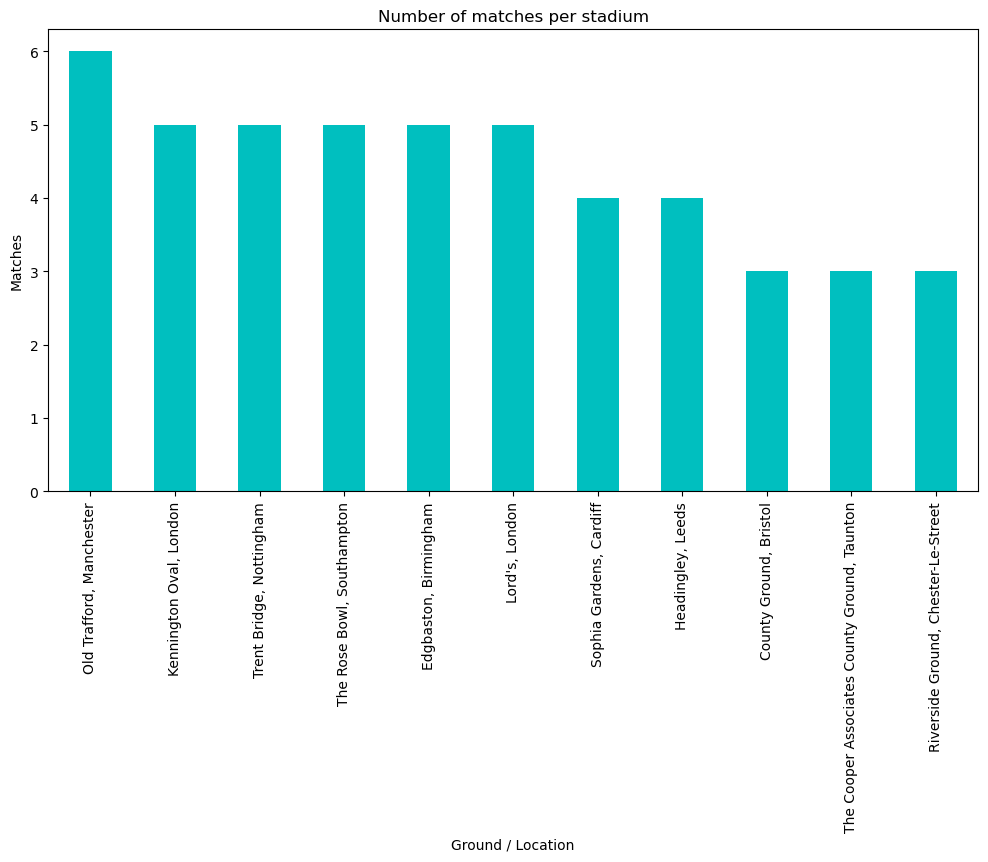

In [33]:
# Q5. Visualization: Matches played per ground.
# Which stadiums hosted the most matches.

plt.figure(figsize=(12,6))
df['Ground / Location'].value_counts().plot(kind='bar',color='c')
plt.title("Number of matches per stadium")
plt.xlabel("Ground / Location")
plt.ylabel("Matches")
plt.show()

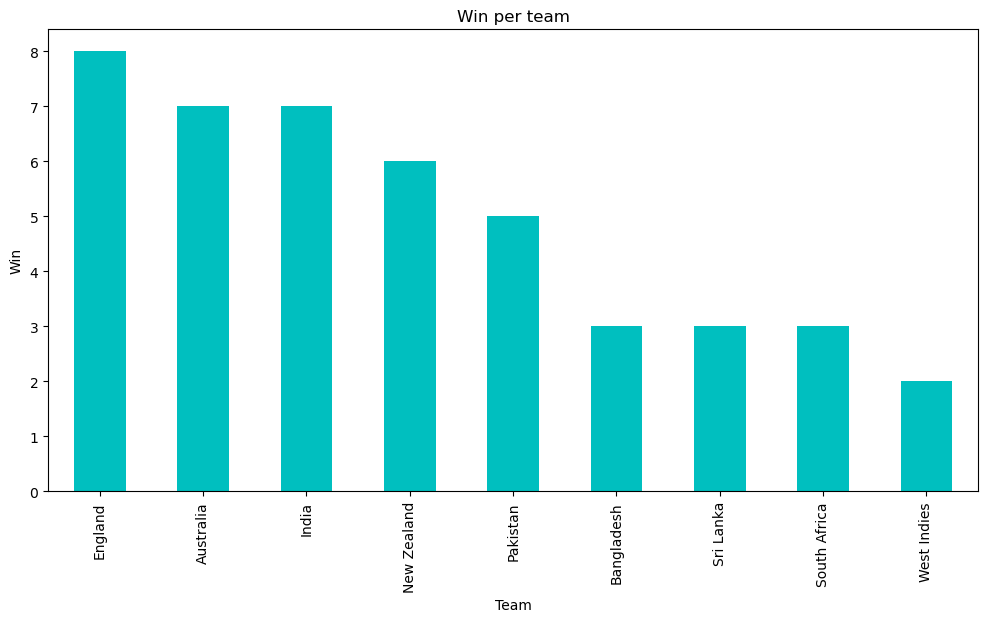

In [34]:
# Q6. Visualization: Wins per team.
# Which team had the most wins.

plt.figure(figsize=(12,6))
df['Winner'].value_counts().plot(kind='bar',color='c')
plt.title("Win per team")
plt.xlabel("Team")
plt.ylabel("Win")
plt.show()

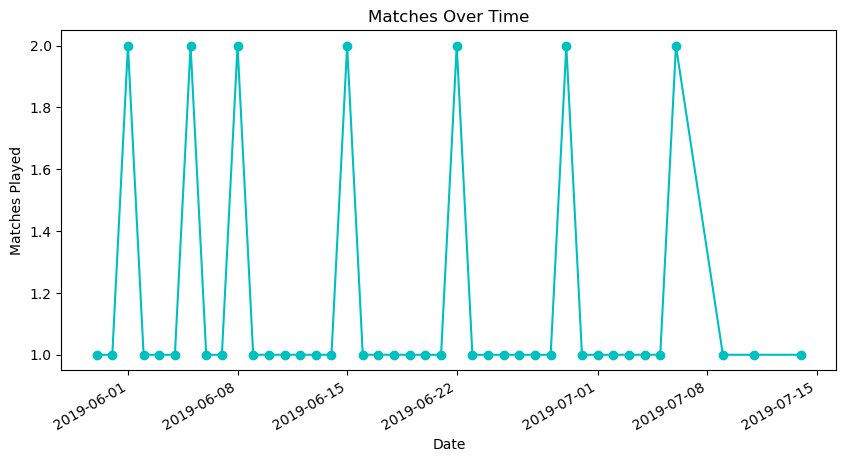

In [35]:
# Q7. Visualization: Matches over time.
# Number of matches per day.

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
matches_per_day = df['Date'].value_counts().sort_index()

plt.figure(figsize=(10,5))
matches_per_day.plot(kind='line', marker='o', color='c')
plt.title('Matches Over Time')
plt.xlabel('Date')
plt.ylabel('Matches Played')
plt.show()

In [ ]:
Final Summary of Insights

Most Successful Team: The team with the highest number of wins was England, followed by Australia and India.

Most Popular Venue: The stadium/ground that hosted the highest number of matches was Old Trafford, Manchester.

Match Outcomes: 1 match ended without a result, likely due to weather or other interruptions.

Tournament Activity Over Time: Match frequency peaked during the middle stages of the tournament. The timeline shows
distinct spikes on days with multiple matches.

Competitive Spread: Wins were spread across many teams, indicating a fairly competitive tournament.